In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [0]:
tsv_file='36151-0003-Data.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('eligible_women.csv',index=False)

C:\Users\vkhanna\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15,16,17,18,19,20,21,28,29,30,31,32,33,34,35,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,62,63,65,66,68,78,79,80,81,82,84,85,86,87,88,89,91,99,100,101,102,105,106,107,108,109,110,113,114,115,116,119,134,135,139,140,145,157,158,161,162,163,164,165,166,167,168,170,171,172,173,174,179,180,181,191,192,193,194,195,196,197,202,203,209,213,217,218,219,220,221,223,224,225,226,227,228,229,232,233,234,235,236,237,248,249,250,251,252,253,254,255,256,257,258,259,260,261,278,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,453,454,458,459,460,461,468,476,510,511,512,513,515) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df = pd.read_csv("eligible_women.csv")

C:\Users\vkhanna\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15,16,17,18,19,20,21,28,29,30,31,32,33,34,35,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,62,63,65,66,68,78,79,80,81,82,84,85,86,87,88,89,91,99,100,101,102,105,106,107,108,109,110,113,114,115,116,119,134,135,139,140,145,157,158,161,162,163,164,165,166,167,168,170,171,172,173,174,179,180,181,191,192,193,194,195,196,197,202,203,209,213,217,218,219,220,221,223,224,225,226,227,228,229,232,233,234,235,236,237,248,249,250,251,252,253,254,255,256,257,258,259,260,261,278,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,453,454,458,459,460,461,468,476,510,511,512,513,515) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.GE10A.unique()

array(['1', ' ', '2'], dtype=object)

In [0]:
df = pd.read_csv("eligible_women_cleaned.csv")

In [0]:
df_ew5 = df[["STATEID","EW5","EW6","EW8","EW9","EW10","EW14A","EW15A","EW15B","EW16A","EW16B","EW16C","EW18A","EW18B","HB1","HB2","HB3","HB4","HB5","HB6","HB7","HB8","AI1","GR9F","GR13A","GR16A","GR17A","GR18A","GR18B","GR22","GR27A","MH1A","MH1E","MH2","MH4A","URBAN2011","METRO","ID11","ID13","COPC","INCOMEPC","NPERSONS","ED2","ED4"]]

In [0]:
df_ew5_dropped_na = df_ew5.dropna()

In [0]:
df_ew5_dropped_na.head()

,EW5,EW6,EW8,EW9,EW10,EW14A,EW15A,EW15B,EW16A,EW16B,EW16C,EW18A,EW18B,HB1,HB2,HB3,HB4,HB5,HB6,HB7,HB8,AI1,GR9F,GR13A,GR16A,GR18A,GR18B,GR22,GR27A,MH1A,MH1E,MH2,MH4A,FP2A,URBAN2011,METRO,ID11,ID13,COPC,INCOMEPC,NPERSONS,ED2,ED4
0,2,4,1,4.0,5.0,0.0,1,1,0.0,0.0,0.0,16,3,0.0,1.0,1.0,3.0,2.0,4.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2.0,1.0,3.0,1.0,0,0,2,3.0,2.0,2.0,9,0.0,0.0
1,4,2,1,3.0,5.0,0.0,1,1,0.0,1.0,0.0,1,1,1.0,0.0,1.0,3.0,2.0,4.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1.0,1.0,3.0,1.0,0,0,2,3.0,2.0,2.0,9,1.0,1.0
6,4,2,1,1.0,2.0,0.0,1,1,0.0,0.0,0.0,1,1,0.0,0.0,2.0,2.0,3.0,4.0,4.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1.0,1.0,3.0,1.0,0,0,2,2.0,2.0,2.0,10,0.0,0.0
7,4,2,1,2.0,4.0,0.0,1,1,0.0,0.0,0.0,1,1,0.0,1.0,1.0,2.0,2.0,4.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1.0,1.0,3.0,1.0,0,0,2,3.0,2.0,2.0,11,0.0,0.0
9,2,3,1,6.0,5.0,0.0,1,1,0.0,0.0,0.0,1,1,1.0,0.0,1.0,2.0,2.0,2.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,3.0,1.0,0,0,2,2.0,1.0,1.0,8,0.0,0.0


In [0]:
df_ew5 = pd.read_csv("cleaned_data.csv.txt", index_col = 0)

In [0]:
df_ew5_dropped_na = df_ew5.dropna()

In [4]:
df_ew5_dropped_na.shape

(22345, 43)

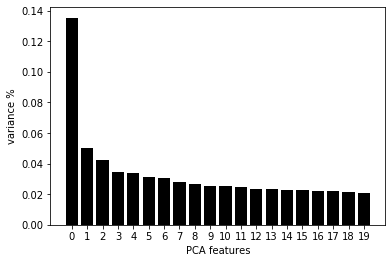

In [0]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df_ew5_dropped_na)
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

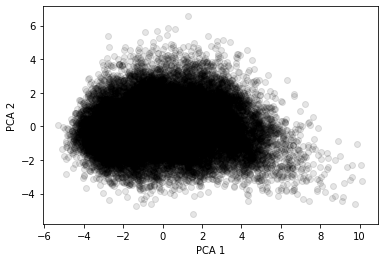

In [0]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

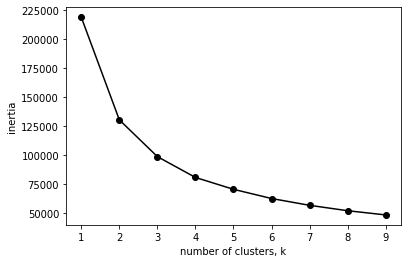

In [0]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [0]:
pca = PCA(n_components=3)
new_df_pca = pca.fit_transform(df_ew5_dropped_na)

In [0]:
existing_df_2d = pd.DataFrame(new_df_pca)
existing_df_2d.index = df_ew5_dropped_na.index
existing_df_2d.columns = ['PC1','PC2']
print(existing_df_2d.head())
print(existing_df_2d.shape)

             PC1          PC2
0   -8336.171010 -4665.973871
1   -8336.171567 -4665.972916
6   -9820.398411  7440.944874
7  -17661.554468  7992.017257
11 -22984.290601 -1029.195320
(20324, 2)


In [0]:
 import numpy as np 
 
 df_matrix = np.array(df_ew5_dropped_na.to_numpy())

In [0]:
df_matrix.shape

(22345, 43)

In [0]:
from sklearn.cluster import AffinityPropagation
clustering = AffinityPropagation().fit(df_matrix)

In [0]:
cluster_centers_indices = clustering.cluster_centers_indices_
labels = clustering.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)

In [0]:
import pickle

pickle.dump(clustering.cluster_centers_,open("cs_cluster_centers.dat","wb"))
pickle.dump(clustering.cluster_centers_indices_,open("cs_cluster_centers_indices.dat","wb"))
pickle.dump(clustering.labels_,open("cs_cluster_labels.dat","wb"))

In [0]:
clustering.cluster_centers_[:1]

array([[1.00000000e+00, 1.00000000e+01, 2.00000000e+00, 4.90000000e+01,
        0.00000000e+00, 4.00000000e+00, 5.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.60000000e+01, 1.50000000e+01, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 3.00000000e+00, 2.00000000e+00,
        4.00000000e+00, 4.00000000e+00, 2.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+01, 1.80000000e+01, 1.00000000e+00, 3.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+00, 3.00000000e+00,
        2.84764453e+04, 1.95666660e+04, 9.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [0]:
len(clustering.labels_)

20324

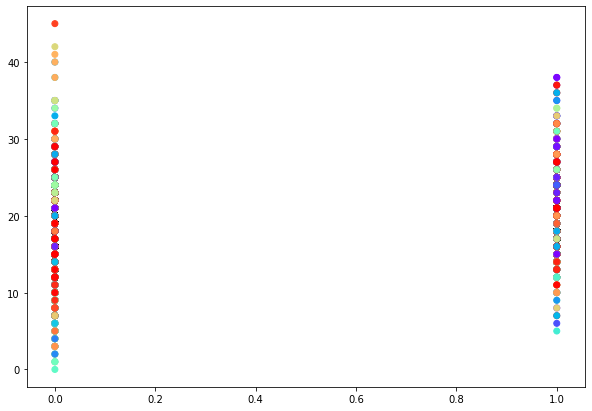

In [0]:
# clustering for EW16A (mother's literacy) and MH1A (literacy of the women)
import pickle
import matplotlib.pyplot as plt

labels = pickle.load(open("cs_cluster_labels.dat", "rb"))

plt.figure(figsize=(10, 7))
plt.scatter(df_matrix[:,10], df_matrix[:,32], c=labels, cmap='rainbow')